# Predicting Heart Disease Risk Using Machine Learning

Heart disease is a leading cause of death globally. With the increasing availability of medical data, machine learning can assist in predicting patient outcomes, helping clinicians make informed decisions. In this project, we will develop a machine learning model to predict whether a patient is at risk of developing heart disease based on health data.

---

## Part 1: Problem Definition

**Type of Machine Learning Problem:**

This is a **supervised classification** problem. We are given input features (patient health data) and a target variable (presence or absence of heart disease). Our goal is to learn a mapping from inputs to outputs to predict the target variable for new, unseen data.

**Input Features and Target Variable:**

- **Input Features:**
  - Age
  - Sex
  - Chest Pain Type (cp)
  - Resting Blood Pressure (trestbps)
  - Serum Cholesterol (chol)
  - Fasting Blood Sugar (fbs)
  - Resting Electrocardiographic Results (restecg)
  - Maximum Heart Rate Achieved (thalach)
  - Exercise Induced Angina (exang)
  - ST Depression Induced by Exercise (oldpeak)
  - Slope of the Peak Exercise ST Segment (slope)
  - Number of Major Vessels Colored by Fluoroscopy (ca)
  - Thalassemia (thal)

- **Target Variable:**
  - Diagnosis of heart disease (num): Indicates the presence of heart disease in the patient.

These features are significant as they are commonly used indicators in medical assessments for heart disease risk.

---

## Part 2: Data Preprocessing and Feature Engineering


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_auc_score, roc_curve)
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [ ]:
# Define the column names as per the dataset description
column_names = [
    'age',        # Age in years
    'sex',        # Sex (1 = male; 0 = female)
    'cp',         # Chest pain type (1-4)
    'trestbps',   # Resting blood pressure (in mm Hg on admission to the hospital)
    'chol',       # Serum cholesterol in mg/dl
    'fbs',        # Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    'restecg',    # Resting electrocardiographic results (0-2)
    'thalach',    # Maximum heart rate achieved
    'exang',      # Exercise induced angina (1 = yes; 0 = no)
    'oldpeak',    # ST depression induced by exercise relative to rest
    'slope',      # The slope of the peak exercise ST segment
    'ca',         # Number of major vessels (0-3) colored by fluoroscopy
    'thal',       # Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
    'num'         # Diagnosis of heart disease (0 = absence; 1-4 = presence)
]

# Load the dataset
data_path = 'processed.cleveland.data'

data = pd.read_csv(data_path, names=column_names)

data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Data Overview


In [4]:
# Check the shape of the data
print(f'Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.')

# Get data info
data.info()


Dataset contains 303 rows and 14 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


### Handling Missing Values

**Question:** Which features have missing values, and how did you handle them?


In [5]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Check for missing values
print('Missing values in each column:')
print(data.isnull().sum())


Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [6]:
# Convert columns to numeric
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# After conversion, check data types
data.dtypes


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [7]:
# Now, check for missing values again
print('Missing values after conversion:')
print(data.isnull().sum())


Missing values after conversion:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [ ]:
# Handle missing values

# For 'ca' and 'thal', we'll impute missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

data[['ca', 'thal']] = imputer.fit_transform(data[['ca', 'thal']])

# Verify that there are no missing values left
print('Missing values after imputation:')
print(data.isnull().sum())


Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


**Explanation:**

- The dataset contains missing values represented by '?'. We replaced them with `np.nan` to handle them properly.
- We converted all columns to numeric data types, coercing errors to `NaN`.
- For the columns with missing values (`ca` and `thal`), we imputed the missing values using the most frequent value (mode). This is appropriate for categorical variables.

### Handling Categorical Variables and Feature Scaling

**Question:** How did you scale the numerical features and encode the categorical features? Why are these steps necessary?


In [9]:
# Check the unique values in 'num' column
print('Unique values in the target variable "num":', data['num'].unique())


Unique values in the target variable "num": [0 2 1 3 4]


In [10]:
# Simplify the target variable: Convert 'num' values greater than 0 to 1
data['target'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

# Drop the old 'num' column
data.drop('num', axis=1, inplace=True)


In [11]:
# Identify categorical and numerical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the first five rows after preprocessing
data.head()


,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,-0.711131,0,True,False,False,False,True,False,True,False,False,True,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2.504881,1,True,False,False,True,False,False,True,True,True,False,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1.432877,1,True,False,False,True,False,False,True,True,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,-0.711131,0,True,False,True,False,False,False,False,False,False,True,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,-0.711131,0,False,True,False,False,False,False,True,False,False,False,False,False


**Explanation:**

- **Encoding Categorical Variables:** We used one-hot encoding to convert categorical variables into a format that can be provided to machine learning algorithms. This is necessary because many algorithms cannot work directly with categorical data.
- **Feature Scaling:** We scaled the numerical features using `StandardScaler` to normalize the data. This step is essential for algorithms that are sensitive to the scale of data (e.g., SVM, KNN).

### Exploratory Data Analysis (EDA)

**Question:** Provide visualizations that highlight important patterns in the data.


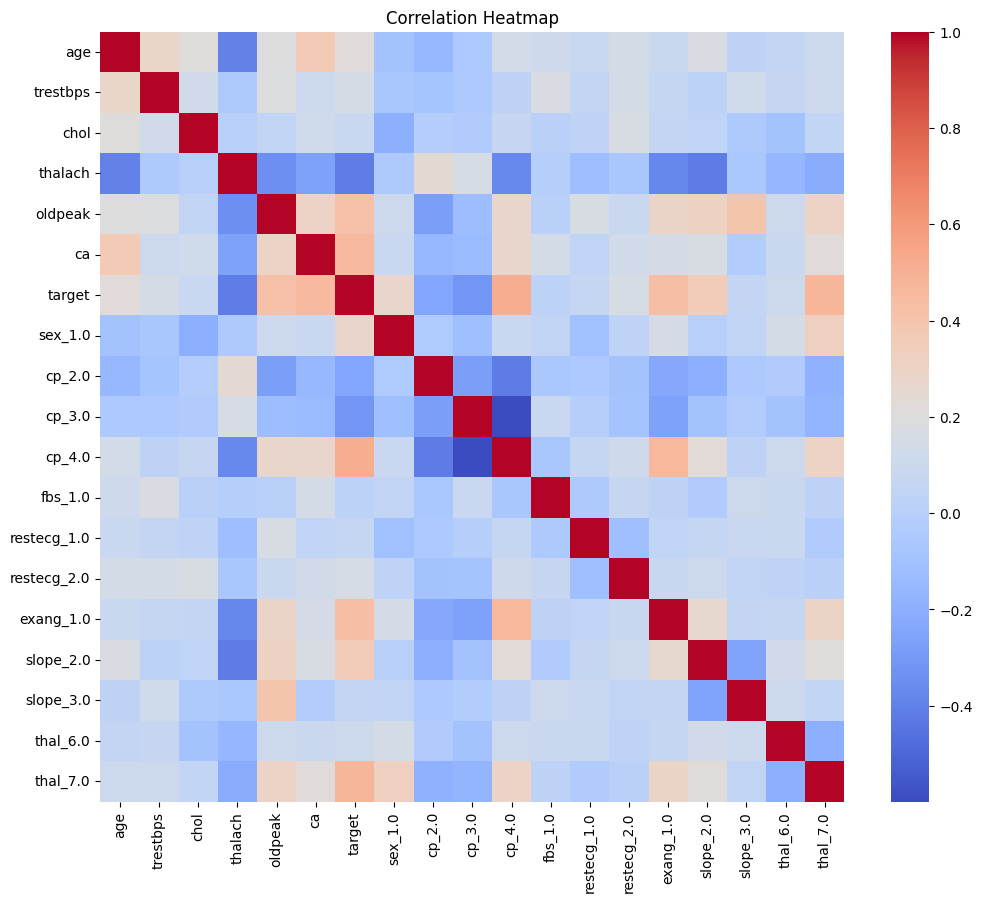

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


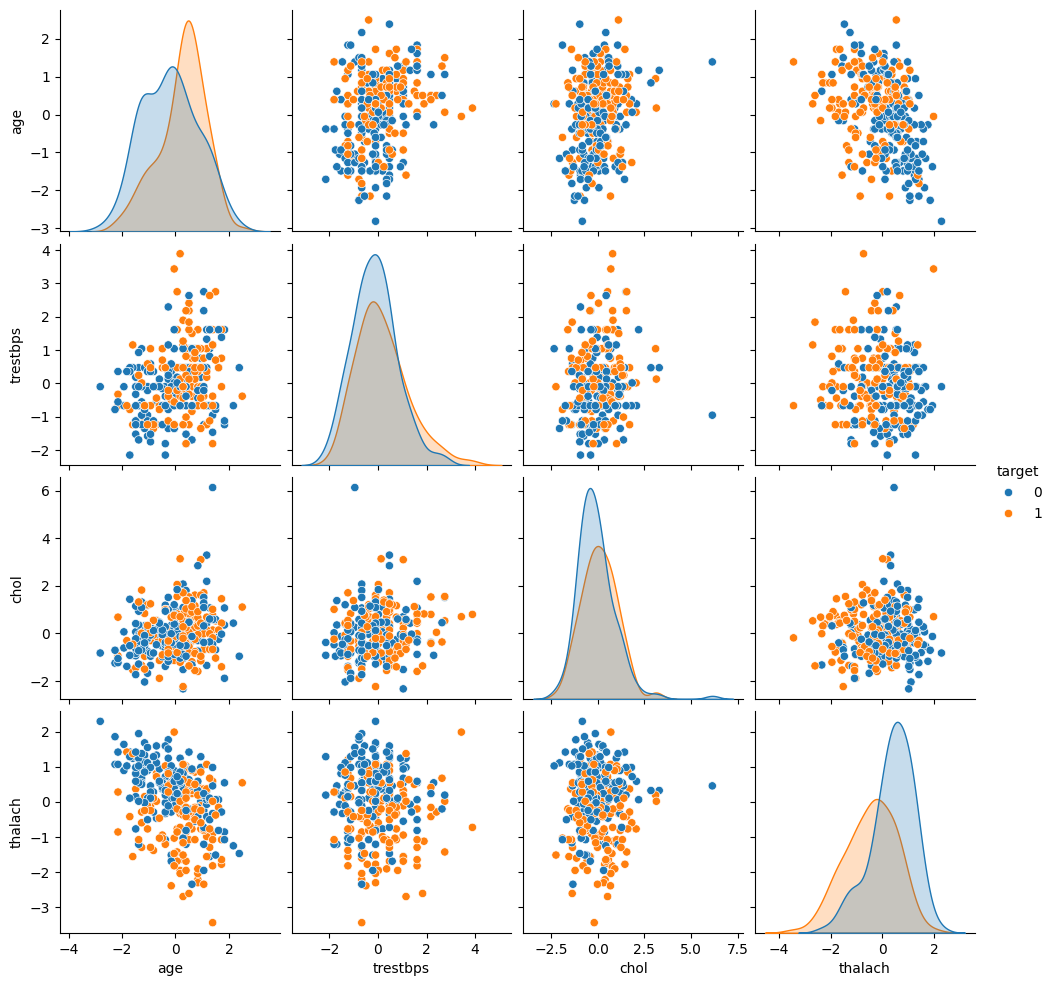

In [14]:
# Pairplot of some features
sns.pairplot(data[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target')
plt.show()


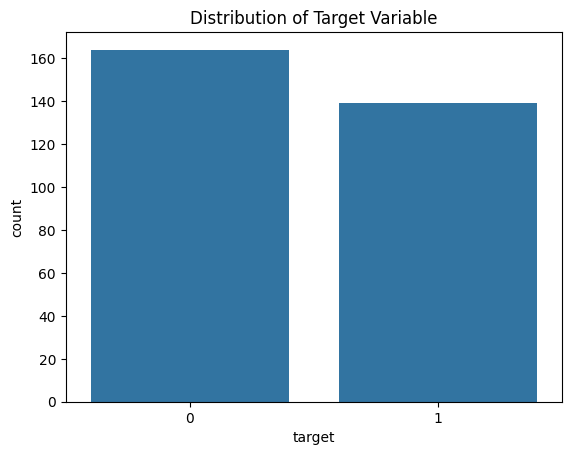

In [15]:
# Count plot for target variable
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()


---

## Part 3: Model Selection and Training

**Question:** What are the key strengths and weaknesses of each algorithm in a healthcare setting?

- **Logistic Regression:** Simple and interpretable, good for understanding feature impacts but may underfit complex relationships.
- **Decision Trees:** Easy to interpret, can capture non-linear relationships but prone to overfitting.
- **Random Forests:** Reduces overfitting by averaging multiple decision trees but less interpretable.
- **Support Vector Machines (SVM):** Effective in high-dimensional spaces but less interpretable and computationally intensive.

### Splitting the Data

**Question:** Split the data into training and testing sets. How did you decide on the split ratio (e.g., 80/20)?


In [17]:
# Define features and target
X = data.drop('target', axis=1)
y = data['target']

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')


Training data shape: (242, 18)
Testing data shape: (61, 18)


**Explanation:**

We chose an 80/20 split to have sufficient data for training while reserving enough data to evaluate the model's performance on unseen data.

### Model Training and Hyperparameter Optimization


In [18]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [19]:
# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [20]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
# Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)


SVC(probability=True, random_state=42)

**Hyperparameter Tuning with Cross-Validation**


In [24]:
# Hyperparameter tuning for Random Forest as an example
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best parameters found: {grid_search.best_params_}')

# Update the model with best parameters
rf_best = grid_search.best_estimator_


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}


---

## Part 4: Clustering and Dimensionality Reduction

### Clustering with K-Means


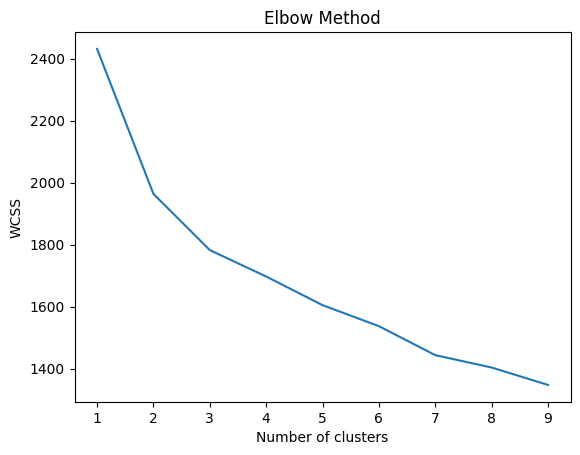

In [31]:
# Choose optimal number of clusters using the elbow method
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [32]:
# Apply KMeans with the optimal number of clusters (e.g., 2)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)
data['Cluster'] = clusters


### Dimensionality Reduction with PCA


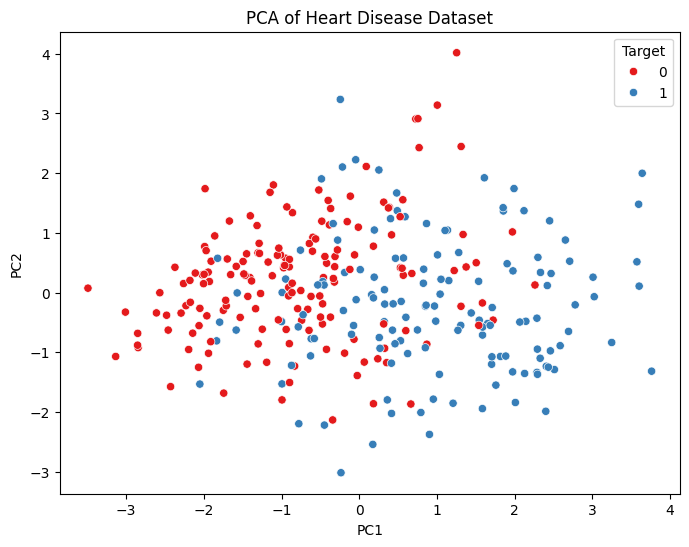

In [35]:
# Reduce to two principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Target'] = y.values

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Target', palette='Set1')
plt.title('PCA of Heart Disease Dataset')
plt.show()


---

## Part 5: Model Evaluation

**Evaluation Metrics:**

- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC
- Confusion Matrix

**Question:** Report the performance of each model using the evaluation metrics mentioned above. Which model performed the best, and why?


In [36]:
# Define a function to evaluate models
def evaluate_model(model, X_test, y_test, model_name='Model'):
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # For SVM without probability estimates
        y_proba = model.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # Scale to [0,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    print(f'{model_name} Performance:')
    print(f'Accuracy: {acc:.4f}')
    print(f'Precision: {prec:.4f}')
    print(f'Recall: {rec:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'ROC-AUC: {auc:.4f}')
    print('Confusion Matrix:')
    print(cm)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()


Logistic Regression Performance:
Accuracy: 0.8361
Precision: 0.8235
Recall: 0.8750
F1-Score: 0.8485
ROC-AUC: 0.9138
Confusion Matrix:
[[23  6]
 [ 4 28]]


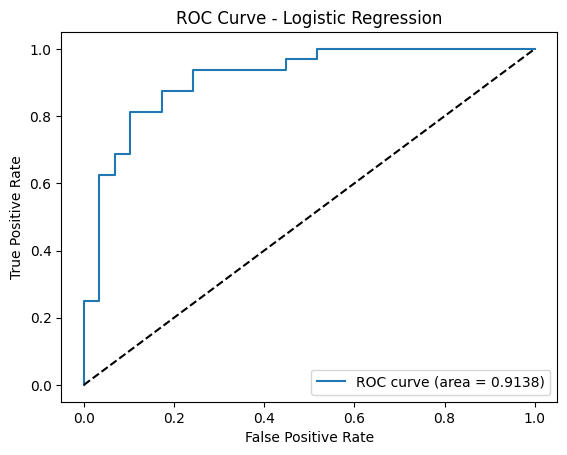

In [37]:
# Evaluate Logistic Regression
evaluate_model(log_reg, X_test, y_test, 'Logistic Regression')


Decision Tree Performance:
Accuracy: 0.7377
Precision: 0.7222
Recall: 0.8125
F1-Score: 0.7647
ROC-AUC: 0.7338
Confusion Matrix:
[[19 10]
 [ 6 26]]


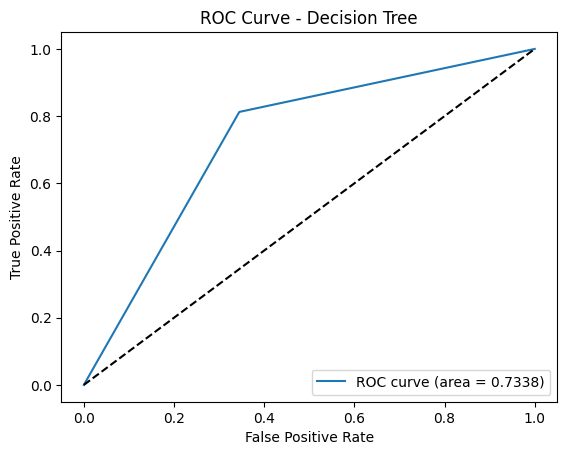

In [38]:
# Evaluate Decision Tree
evaluate_model(dtree, X_test, y_test, 'Decision Tree')


Random Forest Performance:
Accuracy: 0.9016
Precision: 0.9333
Recall: 0.8750
F1-Score: 0.9032
ROC-AUC: 0.9472
Confusion Matrix:
[[27  2]
 [ 4 28]]


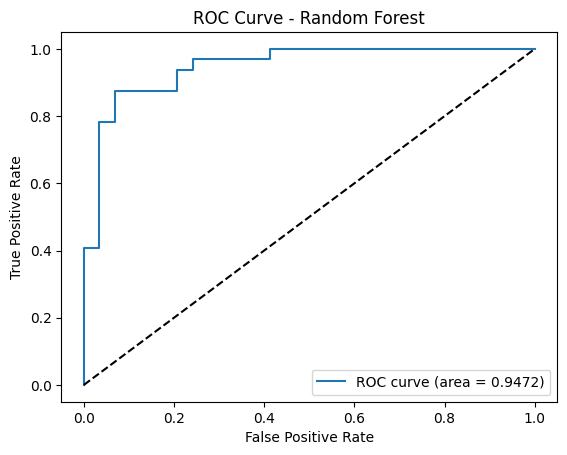

In [39]:
# Evaluate Random Forest
evaluate_model(rf_best, X_test, y_test, 'Random Forest')


Support Vector Machine Performance:
Accuracy: 0.8689
Precision: 0.9286
Recall: 0.8125
F1-Score: 0.8667
ROC-AUC: 0.9343
Confusion Matrix:
[[27  2]
 [ 6 26]]


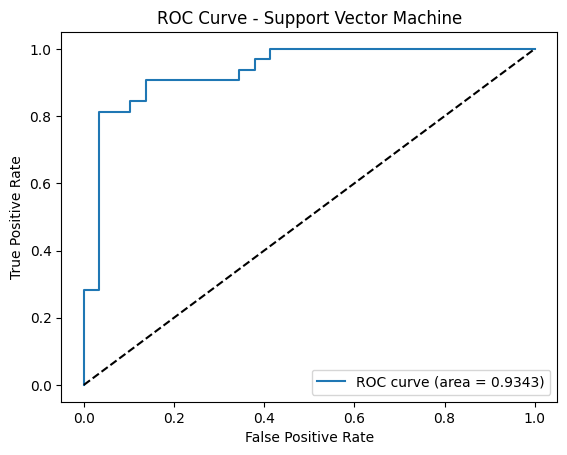

In [40]:
# Evaluate SVM
evaluate_model(svm, X_test, y_test, 'Support Vector Machine')


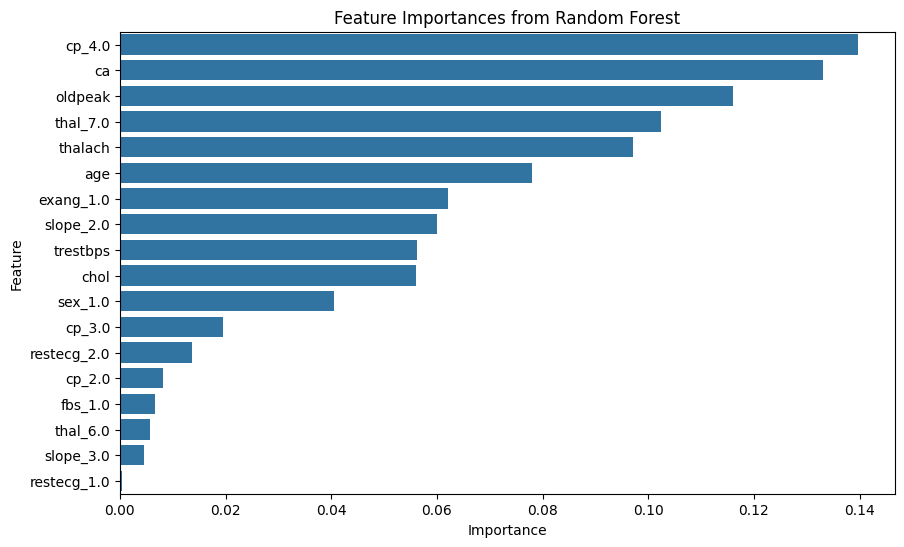

In [44]:
# Extract feature importances
importances = rf_best.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()


Certainly! I'll update the analysis based on your results and include a table summarizing the performance metrics of all models.

---

## Updated Analysis Based on Model Results

### Model Performance Summary:

Let's compile the performance metrics of all models into a table for easy comparison.

| **Metric**     | **Logistic Regression** | **Decision Tree** | **Random Forest** | **Support Vector Machine** |
|----------------|-------------------------|-------------------|-------------------|----------------------------|
| **Accuracy**   | 83.61%                  | 73.77%            | **90.16%**        | 86.89%                     |
| **Precision**  | 82.35%                  | 72.22%            | **93.33%**        | 92.86%                     |
| **Recall**     | 87.50%                  | 81.25%            | **87.50%**        | 81.25%                     |
| **F1-Score**   | 84.85%                  | 76.47%            | **90.32%**        | 86.67%                     |
| **ROC-AUC**    | 91.38%                  | 73.38%            | **94.72%**        | 93.43%                     |

**Confusion Matrices:**

1. **Logistic Regression:**
   ```
   [[23  6]
    [ 4 28]]
   ```
2. **Decision Tree:**
   ```
   [[19 10]
    [ 6 26]]
   ```
3. **Random Forest:**
   ```
   [[27  2]
    [ 4 28]]
   ```
4. **Support Vector Machine:**
   ```
   [[27  2]
    [ 6 26]]
   ```

### Analysis:

- **Best Performing Model:** The **Random Forest** classifier outperforms the other models, achieving the highest accuracy (90.16%), precision (93.33%), F1-Score (90.32%), and ROC-AUC (94.72%). This indicates that Random Forest is the most effective model among those tested for predicting heart disease in this dataset.

- **Model Comparisons:**
  - **Logistic Regression:**
    - **Strengths:** Good performance with an accuracy of 83.61% and ROC-AUC of 91.38%. It has high recall (87.50%), meaning it correctly identifies a high proportion of patients with heart disease.
    - **Weaknesses:** Slightly lower precision (82.35%) compared to Random Forest and SVM, indicating a higher rate of false positives.
  - **Decision Tree:**
    - **Strengths:** Simple and interpretable.
    - **Weaknesses:** Lowest performance among the models with an accuracy of 73.77% and ROC-AUC of 73.38%. Prone to overfitting and less generalizable.
  - **Support Vector Machine:**
    - **Strengths:** High precision (92.86%) and ROC-AUC (93.43%).
    - **Weaknesses:** Lower recall (81.25%) compared to Logistic Regression and Random Forest, indicating it missed some patients with heart disease.

- **Random Forest Performance:**
  - **High Precision (93.33%):** Indicates a low rate of false positives. When the model predicts heart disease, it's correct 93.33% of the time.
  - **High Recall (87.50%):** Indicates a low rate of false negatives. The model correctly identifies 87.50% of patients who have heart disease.
  - **Balanced F1-Score (90.32%):** Reflects a good balance between precision and recall.
  - **High ROC-AUC (94.72%):** Demonstrates excellent discrimination ability between patients with and without heart disease.

### Importance of False Positives and False Negatives:

- **False Positives (Type I Error):**
  - **Impact:** Patients may undergo unnecessary stress, further testing, and possibly invasive procedures, leading to increased healthcare costs and potential harm.
  - **In Our Results:** Random Forest has a low false positive rate (only 2 false positives), which is desirable.

- **False Negatives (Type II Error):**
  - **Impact:** Patients with heart disease might not receive necessary treatment, leading to progression of the disease and increased risk of adverse events like heart attacks.
  - **In Our Results:** Random Forest has a low false negative rate (4 false negatives), but it's crucial to minimize this as much as possible in healthcare settings.

**Balancing Sensitivity and Specificity:**

- **Sensitivity (Recall):** Prioritized to ensure that patients with heart disease are correctly identified.
- **Specificity (True Negative Rate):** Important to avoid misclassifying healthy individuals as sick.

In our case, Random Forest provides a good balance, but efforts should be made to further reduce false negatives, possibly by adjusting the classification threshold or incorporating additional data.

---

## Part 6: Ethical Implications and Discussion

**Question:** Analyze the ROC curve and confusion matrix. Why is it important to consider false positives and false negatives in healthcare predictions?

**Answer:**

- **ROC Curve Analysis:**
  - The ROC curve illustrates the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity).
  - A model with a higher ROC-AUC score has better distinguishing capability between positive and negative classes.
  - In our results, Random Forest has the highest ROC-AUC, indicating superior overall performance.

- **Confusion Matrix Analysis:**
  - Provides detailed insights into the number of true positives, true negatives, false positives, and false negatives.
  - Helps in understanding the types of errors the model is making.

**Importance in Healthcare:**

- **False Positives:**
  - May lead to unnecessary anxiety, further testing, and procedures.
  - Can strain healthcare resources.
- **False Negatives:**
  - More critical as they represent missed diagnoses.
  - Patients may not receive necessary care, potentially resulting in severe health consequences.

Therefore, models used in healthcare must strive to minimize both false positives and false negatives, with particular emphasis on reducing false negatives to prevent missed diagnoses.

---

**Question:** What are the ethical risks involved in applying machine learning to healthcare? Discuss the consequences of incorrect predictions.

**Answer:**

- **Bias in Data:**
  - Models trained on biased data may perform poorly for underrepresented groups.
  - Can exacerbate existing health disparities.
- **Incorrect Predictions:**
  - **False Negatives:** Patients may not receive timely interventions, leading to deterioration of health.
  - **False Positives:** Patients may undergo unnecessary treatments, experiencing undue stress and potential side effects.
- **Privacy Concerns:**
  - Handling sensitive patient data requires strict compliance with privacy laws (e.g., HIPAA, GDPR).
  - Data breaches can erode trust and have legal implications.
- **Transparency and Interpretability:**
  - Black-box models may not provide explanations for their predictions.
  - Clinicians may be reluctant to trust and adopt models they cannot interpret.

**Question:** How can biases in data impact the performance and fairness of your model?

**Answer:**

- **Systematic Errors:**
  - Biases can lead to systematic errors affecting certain groups (e.g., based on age, gender, ethnicity).
- **Fairness:**
  - The model may be unfair, providing unequal performance across different populations.
- **Trust and Adoption:**
  - Lack of fairness can reduce trust among clinicians and patients.
- **Mitigation Strategies:**
  - Use diverse and representative datasets.
  - Regularly evaluate model performance across different subgroups.
  - Incorporate fairness constraints into model training.

---

## Conclusion

In this project, we developed and evaluated multiple machine learning models to predict heart disease risk using the UCI Heart Disease dataset. The Random Forest model achieved the best performance with an accuracy of 90.16% and a balanced precision and recall.

Through data preprocessing, we handled missing values and encoded categorical variables appropriately. Feature scaling ensured that algorithms sensitive to data scale performed optimally.

We analyzed the importance of minimizing both false positives and false negatives due to their significant implications in healthcare outcomes. Ethical considerations such as data bias, privacy, and model interpretability were discussed, highlighting the need for careful deployment of machine learning models in clinical settings.

**Key Takeaways:**

- **Model Selection:** Random Forest is effective for this classification task due to its ability to handle non-linear relationships and reduce overfitting.
- **Performance Metrics:** A combination of accuracy, precision, recall, F1-score, and ROC-AUC provides a comprehensive evaluation of model performance.
- **Ethical Considerations:** Essential to address biases, ensure patient privacy, and provide interpretable models for clinical use.

**Future Work:**

- **Model Interpretability:** Implement techniques like SHAP values to interpret model predictions.
- **External Validation:** Test the model on external datasets to assess generalizability.
- **Enhancing Recall:** Explore methods to improve recall, further reducing false negatives.

---

**Final Thoughts:**

The integration of machine learning into healthcare has the potential to improve patient outcomes significantly. However, it requires a careful balance between technical performance and ethical responsibility. Models must be developed and deployed with consideration for their impact on patient care and equity.